
# A Data-Driven Approach for Predicting Hourly Energy Consumption

This notebook outlines the analysis and forecasting of hourly energy consumption data for Spain. The goal is to explore the data, detect anomalies, and predict future consumption based on external factors such as temperature, solar power, and holidays.



## 1. Data Loading and Preprocessing

We start by loading the Spain energy consumption data and preprocessing it for analysis.
- Load the dataset
- Convert `DATETIME` to a datetime index
- Resample the data to hourly frequency and handle missing values

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load Data
# Load the data again with the correct parsing for the 'DATETIME' column
df = pd.read_csv('/content/historical_metering_data_ES.csv', parse_dates=['DATETIME'])

# Check the column names and confirm that 'DATETIME' is now correctly parsed
print(df.columns)

df = df.sort_values('DATETIME')
df.set_index('DATETIME', inplace=True)

# Check the first few rows of the dataset
df.head()


Index(['DATETIME', 'VALUEMWHMETERINGDATA_customerES_1',
       'VALUEMWHMETERINGDATA_customerES_2',
       'VALUEMWHMETERINGDATA_customerES_5',
       'VALUEMWHMETERINGDATA_customerES_11',
       'VALUEMWHMETERINGDATA_customerES_19',
       'VALUEMWHMETERINGDATA_customerES_30',
       'VALUEMWHMETERINGDATA_customerES_31',
       'VALUEMWHMETERINGDATA_customerES_39',
       'VALUEMWHMETERINGDATA_customerES_40',
       ...
       'VALUEMWHMETERINGDATA_customerES_300',
       'VALUEMWHMETERINGDATA_customerES_307',
       'VALUEMWHMETERINGDATA_customerES_311',
       'VALUEMWHMETERINGDATA_customerES_312',
       'VALUEMWHMETERINGDATA_customerES_313',
       'VALUEMWHMETERINGDATA_customerES_334',
       'VALUEMWHMETERINGDATA_customerES_335',
       'VALUEMWHMETERINGDATA_customerES_336', 'spv', 'temp'],
      dtype='object', length=101)


,VALUEMWHMETERINGDATA_customerES_1,VALUEMWHMETERINGDATA_customerES_2,VALUEMWHMETERINGDATA_customerES_5,VALUEMWHMETERINGDATA_customerES_11,VALUEMWHMETERINGDATA_customerES_19,VALUEMWHMETERINGDATA_customerES_30,VALUEMWHMETERINGDATA_customerES_31,VALUEMWHMETERINGDATA_customerES_39,VALUEMWHMETERINGDATA_customerES_40,VALUEMWHMETERINGDATA_customerES_44,...,VALUEMWHMETERINGDATA_customerES_300,VALUEMWHMETERINGDATA_customerES_307,VALUEMWHMETERINGDATA_customerES_311,VALUEMWHMETERINGDATA_customerES_312,VALUEMWHMETERINGDATA_customerES_313,VALUEMWHMETERINGDATA_customerES_334,VALUEMWHMETERINGDATA_customerES_335,VALUEMWHMETERINGDATA_customerES_336,spv,temp
DATETIME,,,,,,,,,,,,,,,,,,,,,
01-01-2022 00:00,0.001476,0.000020,0.020160,0.021580,0.100,0.027460,0.103,0.064,0.018,0.024,...,0.003472,NaN,0.053,0.002476,0.010,0.006,0.008,NaN,0.0,9.2
01-01-2022 01:00,0.001400,0.000024,0.019116,0.020464,0.102,0.026036,0.105,0.062,0.018,0.024,...,0.003292,NaN,0.053,0.002348,0.011,0.006,0.007,NaN,0.0,8.9
01-01-2022 02:00,0.001360,0.000024,0.018544,0.019856,0.103,0.025264,0.106,0.058,0.019,0.020,...,0.003196,NaN,0.054,0.002276,0.010,0.007,0.008,NaN,0.0,8.8
01-01-2022 03:00,0.001328,0.000024,0.018136,0.019416,0.109,0.024704,0.107,0.049,0.019,0.019,...,0.003124,NaN,0.053,0.002228,0.010,0.006,0.008,NaN,0.0,8.6
01-01-2022 04:00,0.001312,0.000020,0.017920,0.019184,0.103,0.024408,0.105,0.058,0.018,0.018,...,0.003088,NaN,0.056,0.002200,0.011,0.007,0.007,NaN,0.0,8.1


In [33]:
print(df.columns)


Index(['VALUEMWHMETERINGDATA_customerES_1',
       'VALUEMWHMETERINGDATA_customerES_2',
       'VALUEMWHMETERINGDATA_customerES_5',
       'VALUEMWHMETERINGDATA_customerES_11',
       'VALUEMWHMETERINGDATA_customerES_19',
       'VALUEMWHMETERINGDATA_customerES_30',
       'VALUEMWHMETERINGDATA_customerES_31',
       'VALUEMWHMETERINGDATA_customerES_39',
       'VALUEMWHMETERINGDATA_customerES_40',
       'VALUEMWHMETERINGDATA_customerES_44',
       'VALUEMWHMETERINGDATA_customerES_45',
       'VALUEMWHMETERINGDATA_customerES_46',
       'VALUEMWHMETERINGDATA_customerES_48',
       'VALUEMWHMETERINGDATA_customerES_59',
       'VALUEMWHMETERINGDATA_customerES_60',
       'VALUEMWHMETERINGDATA_customerES_61',
       'VALUEMWHMETERINGDATA_customerES_62',
       'VALUEMWHMETERINGDATA_customerES_63',
       'VALUEMWHMETERINGDATA_customerES_64',
       'VALUEMWHMETERINGDATA_customerES_66',
       'VALUEMWHMETERINGDATA_customerES_67',
       'VALUEMWHMETERINGDATA_customerES_69',
       'VALUE

In [39]:
# Check if 'DATETIME' column exists
if 'DATETIME' in df.columns:
    # Convert 'DATETIME' to datetime format with the correct format
    df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%d-%m-%Y %H:%M', errors='coerce')

    # Drop rows where 'DATETIME' conversion failed (if any)
    df = df.dropna(subset=['DATETIME'])

    # Set 'DATETIME' as the index
    df.set_index('DATETIME', inplace=True)
else:
    print("The 'DATETIME' column is missing from the dataset.")

# Ensure the index is of DatetimeIndex type
if not isinstance(df.index, pd.DatetimeIndex):
    print("The index is not a DatetimeIndex, converting...")
    df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M', errors='coerce')

# Resample the data to hourly frequency
df = df.resample('H').asfreq()  # 'h' instead of 'H' to avoid the warning

# Fill missing values using interpolation
df = df.interpolate(method='time')

# Check the first few rows to confirm everything looks good
print(df.head())


The 'DATETIME' column is missing from the dataset.
The index is not a DatetimeIndex, converting...
                     VALUEMWHMETERINGDATA_customerES_1  \
DATETIME                                                 
2022-01-01 00:00:00                           0.001476   
2022-01-01 01:00:00                           0.001400   
2022-01-01 02:00:00                           0.001360   
2022-01-01 03:00:00                           0.001328   
2022-01-01 04:00:00                           0.001312   

                     VALUEMWHMETERINGDATA_customerES_2  \
DATETIME                                                 
2022-01-01 00:00:00                           0.000020   
2022-01-01 01:00:00                           0.000024   
2022-01-01 02:00:00                           0.000024   
2022-01-01 03:00:00                           0.000024   
2022-01-01 04:00:00                           0.000020   

                     VALUEMWHMETERINGDATA_customerES_5  \
DATETIME                     

<ipython-input-39-adbddcdfda31>:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').asfreq()  # 'h' instead of 'H' to avoid the warning



## 2. Exploratory Data Analysis (EDA)

We explore the energy consumption data by checking trends over time, monthly consumption, and potential outliers.



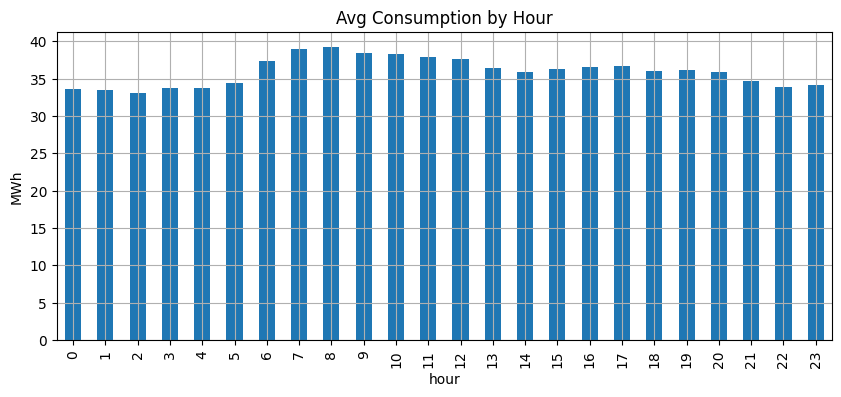

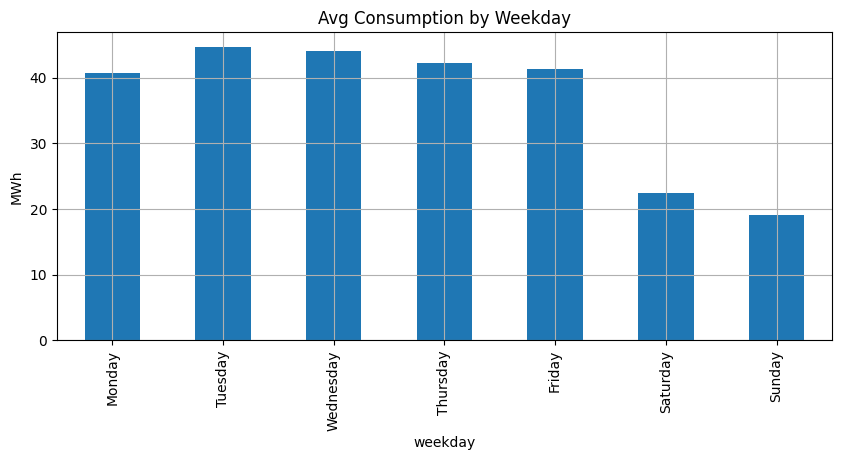

In [66]:
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()

# Hourly Avg
df.groupby('hour')['total_consumption'].mean().plot(kind='bar', figsize=(10, 4), title="Avg Consumption by Hour")
plt.ylabel("MWh")
plt.grid(True)
plt.show()

# Weekday Avg
df.groupby('weekday')['total_consumption'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', figsize=(10, 4), title="Avg Consumption by Weekday")
plt.ylabel("MWh")
plt.grid(True)
plt.show()



## 3. Outlier Detection and Handling

We analyze the data to detect and visualize any potential outliers in energy consumption.

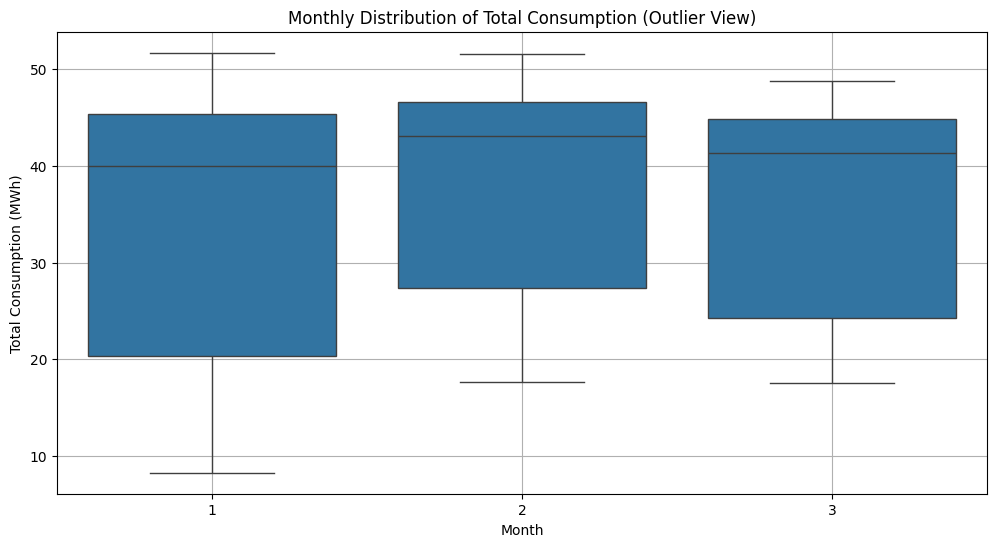

In [67]:
plt.figure(figsize=(12, 6))
df['month'] = df.index.month
sns.boxplot(x='month', y='total_consumption', data=df)
plt.xlabel('Month')
plt.ylabel('Total Consumption (MWh)')
plt.title('Monthly Distribution of Total Consumption (Outlier View)')
plt.grid(True)
plt.show()



ADF Test for Stationarity in Energy Consumption Data

In [68]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['total_consumption'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("✅ Data is stationary")
else:
    print("🚫 Data is NOT stationary")





ADF Statistic: -8.605444469948035
p-value: 6.691956990751479e-14
✅ Data is stationary


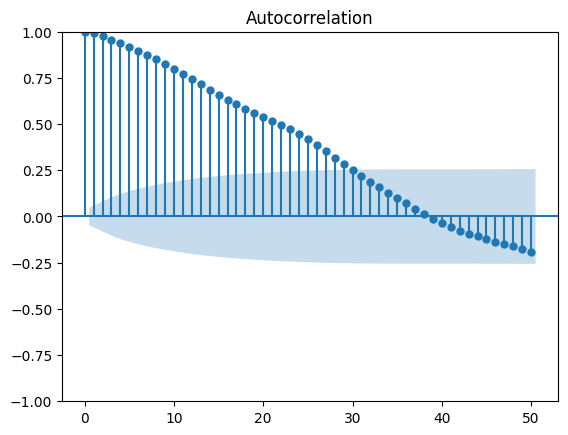

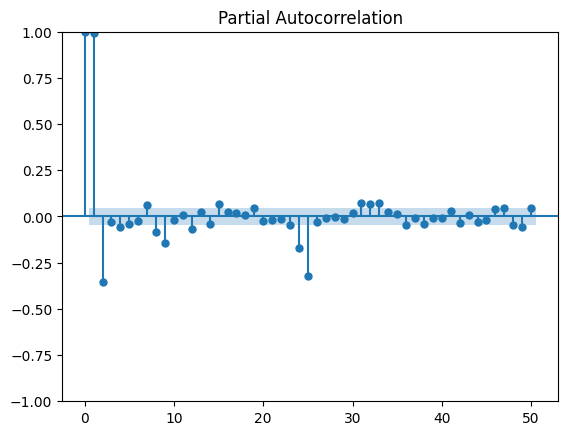

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['total_consumption'].dropna(), lags=50)
plot_pacf(df['total_consumption'].dropna(), lags=50)
plt.show()


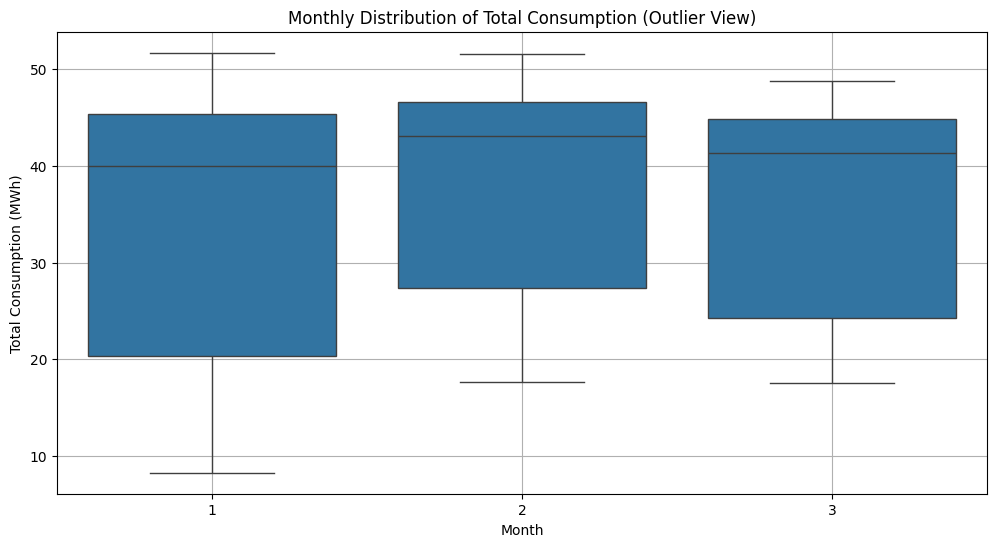

In [70]:
plt.figure(figsize=(12, 6))
df['month'] = df.index.month
sns.boxplot(x='month', y='total_consumption', data=df)
plt.xlabel('Month')
plt.ylabel('Total Consumption (MWh)')
plt.title('Monthly Distribution of Total Consumption (Outlier View)')
plt.grid(True)
plt.show()


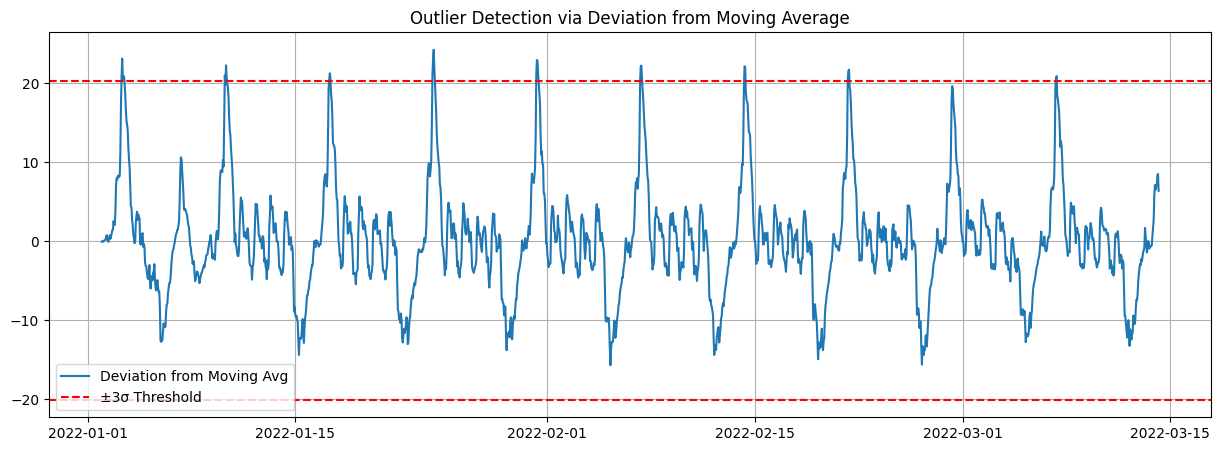

In [64]:
df['moving_avg'] = df['total_consumption'].rolling(window=24).mean()
df['deviation'] = df['total_consumption'] - df['moving_avg']

plt.figure(figsize=(15,5))
plt.plot(df.index, df['deviation'], label='Deviation from Moving Avg')
plt.axhline(df['deviation'].mean() + 3*df['deviation'].std(), color='red', linestyle='--', label='±3σ Threshold')
plt.axhline(df['deviation'].mean() - 3*df['deviation'].std(), color='red', linestyle='--')
plt.legend()
plt.grid()
plt.title("Outlier Detection via Deviation from Moving Average")
plt.show()


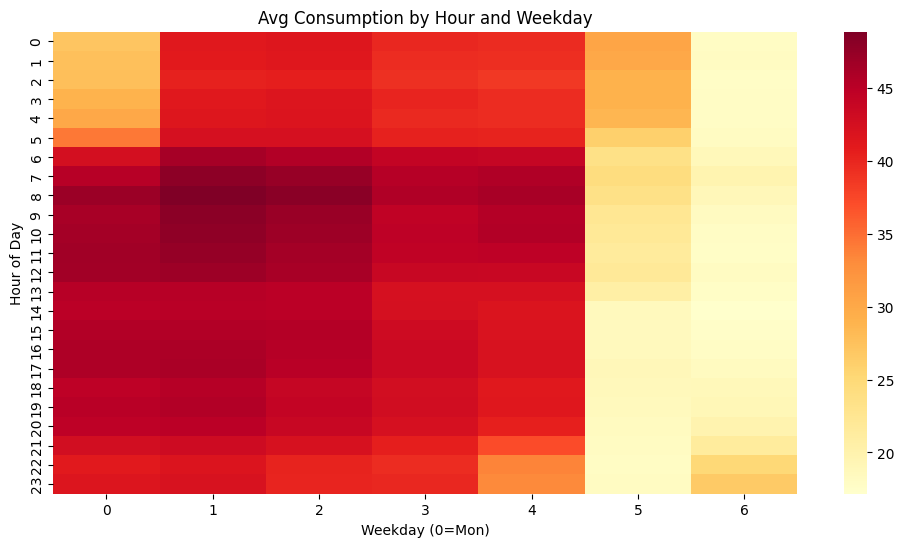

In [61]:
df['weekday'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday
pivot = df.pivot_table(index='hour', columns='weekday', values='total_consumption', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrRd', annot=False)
plt.title('Avg Consumption by Hour and Weekday')
plt.xlabel('Weekday (0=Mon)')
plt.ylabel('Hour of Day')
plt.show()


<ipython-input-62-d5c026a73aa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus['rolling_mean'] = focus['total_consumption'].rolling(24).mean()


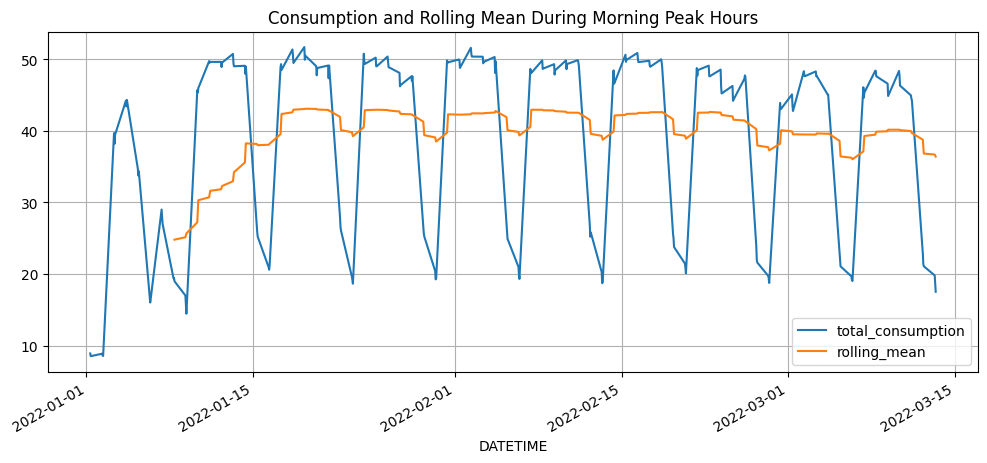

In [62]:
focus = df[df.index.hour.isin([8, 9, 10])]
focus['rolling_mean'] = focus['total_consumption'].rolling(24).mean()
focus[['total_consumption', 'rolling_mean']].plot(figsize=(12,5))
plt.title("Consumption and Rolling Mean During Morning Peak Hours")
plt.grid()
plt.show()


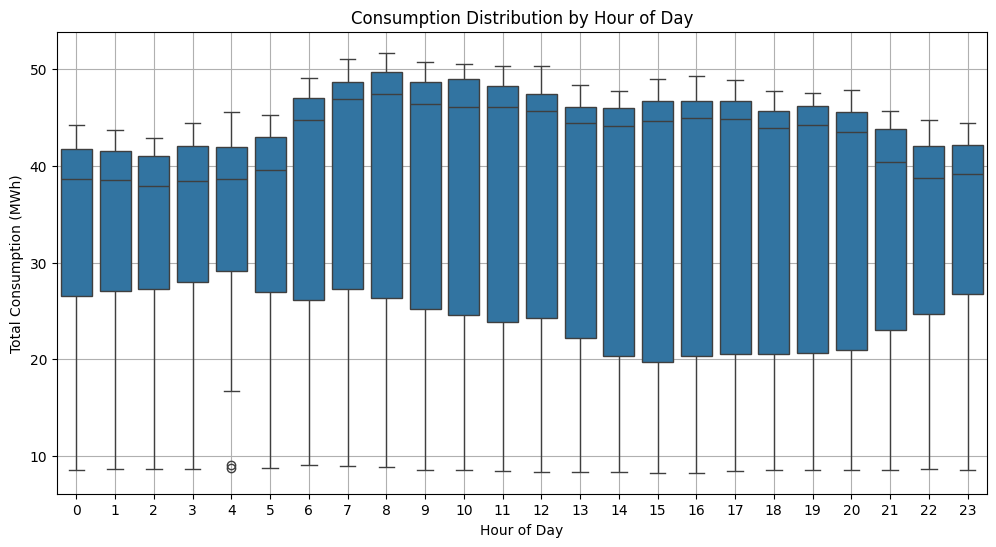

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='total_consumption', data=df)
plt.title('Consumption Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Consumption (MWh)')
plt.grid()
plt.show()
